# 1、数据集选择
选择[**泰坦尼克号数据**](https://d17h27t6h515a5.cloudfront.net/topher/2016/December/584bcec3_titanic-data/titanic-data.csv)作为数据集研究，该数据取自于泰坦尼克号2224名乘客中的891名乘客的数据。

## 1.1 该数据集包含字段如下：



字段 | 定义 | Key
------------ | ------------- | ------------
Survived | 是否生还  | 0 = No, 1 = Yes
Pclass | 票的类型  | 1 = 1st, 2 = 2nd, 3 = 3rd
Sex | 性别  | 男性 = male， 女性 = female
Age | 截止到统计时间的年龄  | 
SibSp | 船上兄弟姐妹的个数  | 
Parch | 船上父母和孩子的个数  | 
Ticket | 票编号  | 
Fare | 客运票价  | 
Cabin | 船舱编号  | 
Embarked | 出发港口  | 



## 1.2 感兴趣的问题如下:
一. 船上的人生还率与哪些因素有关？

1. 与票的类型是否有关？
2. 与性别是否有关？
3. 与年龄是否有关？
4. 与船上兄弟姐妹的个数是否有关？
5. 与船上父母子女的个数是否有关？
6. 与出发港口是否有关？


二. 哪些因素会让生化能力更高？

# 2、数据加工与分析

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [99]:
titanic_data = pd.read_csv('titanic-data.csv')

In [100]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2.1 泰坦尼克号的样本生还率

In [143]:
# 样本的生还率计算如下：
overall_survival_rate = titanic_data['Survived'].mean()
print overall_survival_rate

0.383838383838


由于样本量为891，大于30，根据中心极限定理，当样本量大于30时，样本均值分布服从正态分布。

由于样本量足够大，我们有理由相信，整体的生还率为38.39%

## 2.2 生还率与票的类型的关系
将样本中所有人按照“是否生还”进行分组”，计算每一组的人数如下：

In [104]:
# 按照“是否生还”进行分组
titanic_data.groupby(['Survived']).count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


In [144]:
#按船票类型分组，每组人数如下：
pclass_survival_number = titanic_data.groupby(['Pclass'],as_index=False)['Survived'].count()
print 'pclass_survival_number:' + `pclass_survival_number`

pclass_survival_number:   Pclass  Survived
0       1       216
1       2       184
2       3       491


由于分组后，样本量均大于30，故用分组后的样本估算每个组的生还率是可信的。

([<matplotlib.patches.Wedge at 0x1192c1dd0>,
  <matplotlib.text.Text at 0x1192e7390>])

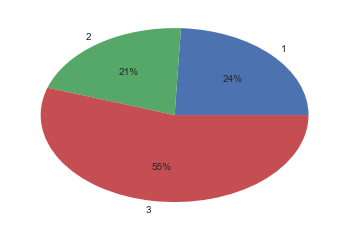

In [147]:
# 按船票类型分组，人数分布图
plt.pie(pclass_survival_number['Survived'], labels = pclass_survival_number['Pclass'], autopct='%.0f%%')

In [148]:
#按船票类型分组，生还率如下：
pclass_survival_rate = titanic_data.groupby(['Pclass'])['Survived'].mean()
print 'pclass_survival_rate:' + `pclass_survival_rate`

pclass_survival_rate:Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


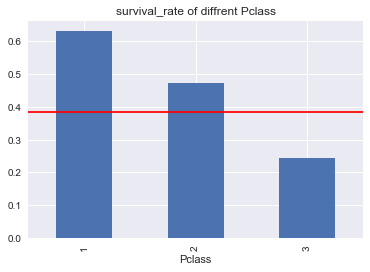

In [149]:
#做出三种船票等级下，生存率的柱状图如下

pclass_survival_rate.plot(kind='bar')
plt.plot([-1,4], [overall_survival_rate,overall_survival_rate], 'k-',color='red')
plt.title('survival_rate of diffrent Pclass')

从图中可以看出，Pclass=1时，生还率最高；Pclass=2时，生还率其次；Pclass=3时，生还率低于平均水平。

由于样本中，三种船票分别是一等船票216人，占比24%；二等船票184人，占比21%；三等船票491人，占比55%

样本进行分组后，每组的样本量均超过30人，故而用样本结论估算整体结论可信。




结论：

**不同种类的Pclass对生还率影响很大，整体生还率高低为 “Pclass=1” > “Pclass=3” > “Pclass=3”**

## 2.3 生还率与性别的关系

In [108]:
# 按不同性别分组后，每组人数分布如下：
sex_survival_number = titanic_data.groupby(['Sex'],as_index=False)['Survived'].count()
print sex_survival_number

      Sex  Survived
0  female       314
1    male       577


([<matplotlib.patches.Wedge at 0x1182539d0>,
  <matplotlib.text.Text at 0x11826d150>])

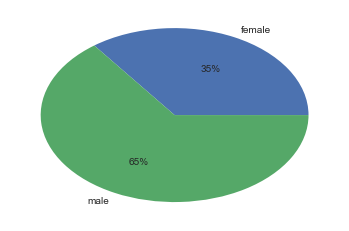

In [109]:
# 不同性别，人数分布饼状图：
plt.pie(sex_survival_number['Survived'], labels = sex_survival_number['Sex'], autopct='%.0f%%')

In [110]:
#按性别分组后，每组的生存率
sex_survival_rate = titanic_data.groupby(['Sex'])['Survived'].mean()
print sex_survival_rate

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


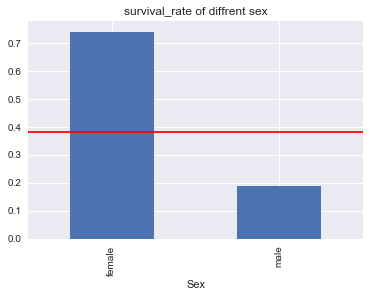

In [111]:
#不同性别的生还率分布柱状图如下

sex_survival_rate.plot(kind='bar')
plt.plot([-1,4], [overall_survival_rate,overall_survival_rate], 'k-',color='red')
plt.title('survival_rate of diffrent sex')

结论：

**女性的生存率远高于男性**

## 2.4 生还率与年龄的关系

In [112]:
# 找出年龄的统计数据
titanic_data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [113]:
# 由于年龄区间是0~80，将年龄按照10岁一个阶段，分成8个组，如下：

bins = np.arange(0,81,10)
titanic_data['Age_group'] = pd.cut(titanic_data['Age'], bins)

In [114]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20, 30]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(30, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20, 30]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(30, 40]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(30, 40]"


In [115]:
#按年龄分组，每组的人数如下：
by_Age_num = titanic_data.groupby('Age_group',as_index=False)['Survived'].count()
by_Age_num

,Age_group,Survived
0,"(0, 10]",64
1,"(10, 20]",115
2,"(20, 30]",230
3,"(30, 40]",155
4,"(40, 50]",86
5,"(50, 60]",42
6,"(60, 70]",17
7,"(70, 80]",5


([<matplotlib.patches.Wedge at 0x118415710>,
  <matplotlib.text.Text at 0x118557150>])

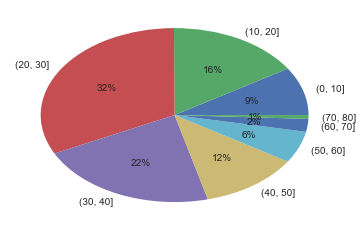

In [116]:
#按年龄分布的饼状图如下：

plt.pie(by_Age_num['Survived'], labels = by_Age_num['Age_group'], autopct='%.0f%%')

观察表中每组的人数，前6组人数均大于30人，用来估算整体的生还率可信度较高，有争议的是(60,70],(70,80]这两组数据，由于样本量太少，可能使生还率计算有一定的误差。

In [117]:
#计算各组的生还率如下：
by_Age = titanic_data.groupby('Age_group')['Survived'].mean()
print by_Age

Age_group
(0, 10]     0.593750
(10, 20]    0.382609
(20, 30]    0.365217
(30, 40]    0.445161
(40, 50]    0.383721
(50, 60]    0.404762
(60, 70]    0.235294
(70, 80]    0.200000
Name: Survived, dtype: float64


从上面的结果可以看出，年龄已经按指定的方式分好组了，且每一组的生还率也计算出来了。

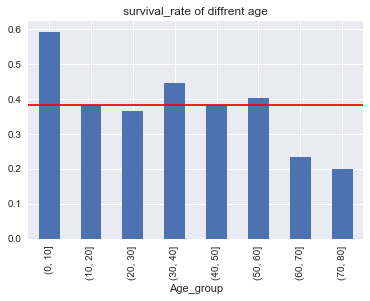

In [118]:
# 用柱状图表示年龄组与生还率的关系如下

by_Age.plot(kind='bar')
plt.plot([-1,10], [overall_survival_rate,overall_survival_rate], 'k-',color='red')
plt.title('survival_rate of diffrent age')

结论：

**年龄大小与生还率整体呈下降趋势，(60,70],(70,80]这两组数据由于样本量太少，可能存在误差**

## 2.5 生还率与船上兄弟姐妹个数的关系

In [127]:
# 按兄弟姐妹的个数进行分组，每组人数如下：
SibSp_survival_num = titanic_data.groupby(['SibSp'],as_index=False)['Survived'].count()
print SibSp_survival_num

   SibSp  Survived
0      0       608
1      1       209
2      2        28
3      3        16
4      4        18
5      5         5
6      8         7


分组以后可知，当兄弟姐妹个数>2时，样本量都远小于30，故而用来估算整体生还率可能存在误差

In [150]:
# 按兄弟姐妹的个数进行分组，计算生还率如下：
SibSp_survival_rate = titanic_data.groupby(['SibSp'])['Survived'].mean()
print SibSp_survival_rate

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64


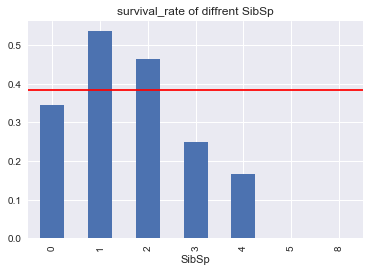

In [151]:
#做出相关的柱状图

SibSp_survival_rate.plot(kind='bar')
plt.plot([-1,10], [overall_survival_rate,overall_survival_rate], 'k-',color='red')
plt.title('survival_rate of diffrent SibSp')

结论：

**有1~2个兄弟姐妹的人生还率更高，但由于兄弟姐妹数量为3，4，5，8的4个分组样本量都太小，可能造成比较大的误差，结论可信度不高**

## 2.6 生还率与船上父母子女个数的关系

In [130]:
# 按父母子女的个数进行分组，每组人数如下：
Parch_survival_num = titanic_data.groupby(['Parch'],as_index=False)['Survived'].count()
print Parch_survival_num

   Parch  Survived
0      0       678
1      1       118
2      2        80
3      3         5
4      4         4
5      5         5
6      6         1


In [121]:
# 按父母子女的个数进行分组，计算生还率如下：
Parch_survival_rate = titanic_data.groupby(['Parch'])['Survived'].mean()
print Parch_survival_rate

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


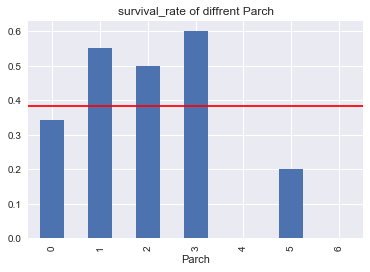

In [122]:
#做出相关的柱状图

Parch_survival_rate.plot(kind='bar')
plt.plot([-1,10], [overall_survival_rate,overall_survival_rate], 'k-',color='red')
plt.title('survival_rate of diffrent Parch')

结论：

**有1~3个父母子女的人生还率更高，但由于父母子女数量为3，4，5，6的4个分组样本量都太少，可能造成比较大的误差，结论可信度不高**

## 2.7 生还率与出发港口的关系

In [131]:
# 按出发港口进行分组，每组人数如下：
Embarked_survival_num = titanic_data.groupby(['Embarked'],as_index=False)['Survived'].count()
print Embarked_survival_num

  Embarked  Survived
0        C       168
1        Q        77
2        S       644


([<matplotlib.patches.Wedge at 0x118d28550>,
  <matplotlib.text.Text at 0x118de0a90>])

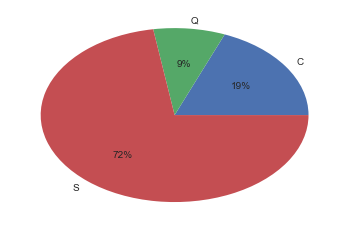

In [132]:
# 不同港口出发，人数分布饼状图：
plt.pie(Embarked_survival_num['Survived'], labels = Embarked_survival_num['Embarked'], autopct='%.0f%%')

In [123]:
# 按出发港口进行分组，计算生还率如下：
Embarked_survival_rate = titanic_data.groupby(['Embarked'])['Survived'].mean()
print Embarked_survival_rate

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


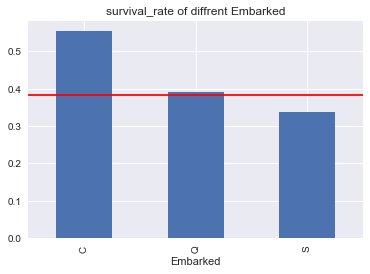

In [124]:
#做出相关的柱状图

Embarked_survival_rate.plot(kind='bar')
plt.plot([-1,10], [overall_survival_rate,overall_survival_rate], 'k-',color='red')
plt.title('survival_rate of diffrent Embarked')

结论：

**从不同港口出发的生还率高低如下：Cherbourg > Queenstown > Southampton**

# 3、总结和预测

## 3.1 样本数据说明
报告中使用的数据样本量为891，不是全部乘客的数据。但样本量数据远大于30，故而可以代表整体人口。

## 3.2 哪些因素与生还率有关？
上述步骤逐一分析了各种因素与船上的人的生还率之间的关系。

从以上结论可以得出可信结论如下：

1. 整体的生还率为38.39%
2. 女性的生还率为74.20%，男性的生还率为18.89%，女性的生还率远高于男性；
3. 购买不同类型船票的人，生还率规律如下: 购买一等船票的生还率62.96% > 二等船票47.28% > 三等船票24.24%；
4. 从不同港口出发的生还率高低如下：Cherbourg(55.36%) > Queenstown(38.96%) > Southampton(33.70%)

## 3.3 哪些因素可能与生还率有关，但存在偏差
由于部分分组样本量太少，导致结论可能有偏差的如下：

1. 不同年龄的生还率呈现大致以下趋势：随着年龄增加，生还率呈下降趋势。由于(60,70],(70,80]这两组数据，样本量太少，可能导致这两组数据的估算存在偏差；
2. 有1~2个兄弟姐妹的人，生存率远高于其他。由于兄弟姐妹人数多于2个的样本量太少，估算也可能存在偏差，不足以代表整体数据；
3. 有1~3个父母子女的人，生存率远高于其他。由于父母子女人数多于2个的样本量太少，估算也有可能存在偏差，不足以代表整体数据；

## 3.4 哪些因素可能可能影响生还率，但没有数据
可能因素如下：

1. 是否有疾病，是否会有生病的人主动放弃生还的机会
2. 是否有文化影响，例如儿童和女士优先社会规则
3. 受教育的水平
4. 乘客的职业，是否有一些职业会受到特殊的保护，例如科学家之类的

## 3.5 备注

以上结论均来源于上述分析，结论只是暂时的，后续随着掌握的内容更多，可能会有更细致的分析。